In [53]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
np.random.seed(0)

In [91]:
# assume the graph fits in memory of a machine.
class Partition:
    def __init__(self,edges=None):
        self.vertices = set()
        if(edges is None):
            self.num_edges = 0
            self.num_vertices = 0
            self.edges = []
        else:   
            self.num_edges = len(edges)
            self.edges = edges

            for e in edges:
                self.vertices.add(e[0])
                self.vertices.add(e[1])

            self.num_vertices = len(self.vertices)
        
    def to_adj_lst(self):
        pass
    
    def get_vertex_set(self):
        return self.vertices
    
    def add_edge(self,e):
        self.edges.append(e)
        self.vertices.add(e[0])
        self.vertices.add(e[1])
        self.num_vertices = len(self.vertices)
        self.num_edges+=1
        
    
def read_edge_list(file_path):
    edges = []
    f = open(file_path)
    for l in f:
        s = l.rstrip('\n').split(' ')
        edges.append([int(s[0]), int(s[1])])
        
    return edges
    

In [130]:
# random, vertex-cut
from collections import defaultdict
def random_vertex_cut(edges, num_parts):
    pmt = np.random.permutation(len(edges))
    ps = int(len(edges)/num_parts)
    lst_parts = []
    for i in range(num_parts):
        pe = [ edges[j] for j in pmt[i*ps:(i+1)*ps]]
        lst_parts.append(Partition(pe))
    return lst_parts

def get_random_from_set(s):
    i = 0
    if(len(s)==1):
        i = 0
    else:
        i = random.randint(0,len(s)-1)
    return list(s)[i]

def greedy_vertex_cut(edges,num_parts):
    pmt = np.random.permutation(len(edges))
    #print(len(pmt))
    lst_parts = [Partition() for i in range(num_parts)]
    A_map = defaultdict(set)
    unassigned_edge_count = defaultdict(int)
    I = np.arange(num_parts)
    
    for e in edges:
        # TODO: directed or undirected??
        u,v = e
        unassigned_edge_count[u]+=1
        unassigned_edge_count[v]+=1
        
    for i in pmt:
        j =0
        u,v = edges[i]
        Au = A_map[u]
        Av = A_map[v]
        s = Au.intersection(Av)
        #print(u,v)
        #print(Au,Av,s)
        if(len(s)>0):
            j = s.pop() # Case 1
            
            #lst_parts[p].add_edge(edges[i])
        else:
            if(len(Au)==0 and len(Av)==0):
                # Case 4
                l = np.array([p.num_edges for p in lst_parts])
                #print(np.argmin(l))
                
                j = get_random_from_set(set(I[l==l[np.argmin(l)]]))
                
                
                #
            elif(len(Au) >0 and len(Av)>0):
                # Case 2
                # assign the edge to the partition with vertex (among u,v) with most unassigned edges
                uec_u = unassigned_edge_count[u]
                uec_v = unassigned_edge_count[v]
                if(uec_u>=uec_v):
                    j = get_random_from_set(Au) #Au.pop() 
                else:
                    j = get_random_from_set(Av)#Av.pop()
            else:
                # Au or Av is empty
                if(len(Au)>0):
                    j = get_random_from_set(Au)#Au.pop()
                else:
                    j = get_random_from_set(Av)#Av.pop()
  
        lst_parts[j].add_edge(edges[i])
        unassigned_edge_count[u]-=1
        unassigned_edge_count[v]-=1
        A_map[u].add(j)
        A_map[v].add(j)
        
    return lst_parts

def random_edge_cut(edges,num_parts):
    #evenly distribute vertices 
    #? replicate the edges cut?? or discard the edge cut?? 
    # what to do with the edges cut?? 
    pass

def some_other_better_edge_cut(edges, num_parts):
    pass
def greedy_edge_cut_2(edges,num_parts):
    # apply edge cut first.
    # cut the vertex with high degree??
    pass

def num_common_vertices(p1,p2):
    return len(p1.vertices.intersection(p2.vertices))

In [49]:
g = nx.complete_graph(100)
lst_edges = list(g.edges)
lst_parts = random_vertex_cut(lst_edges,120)
for p in lst_parts:
    print(p.num_edges)
    #print(p.edges)

41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41


In [51]:
for i in range(3):
    for j in range(i+1):
        print(i,j,num_common_vertices(lst_parts[i],lst_parts[j]))

0 0 56
1 0 29
1 1 57
2 0 27
2 1 25
2 2 51


In [10]:
edges = read_edge_list('power_law_n_20000_m_20_p_0.1_num_edges_399442.edgelist')

In [20]:
np.random.seed(0)
np.random.permutation(10)

array([2, 8, 4, 9, 1, 6, 7, 3, 0, 5])

[[0.0005 0.0005 0.0005]
 [0.0005 0.0005 0.0005]
 [0.0005 0.0005 0.0005]]
0.201
0.201
0.201
[[0.2    0.0005 0.0005]
 [0.0005 0.2    0.0005]
 [0.0005 0.0005 0.2   ]]
3
66820
133.77377377377377
n_1000_parts_3_p1_0.2_p2_0.001_num_edges_66820_


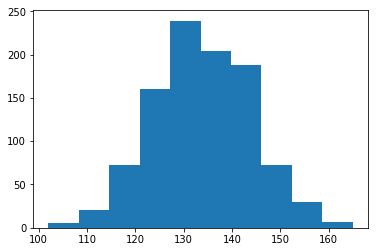

In [85]:
N = 1000
p = 3
p1 = 0.2
p2 = 0.001
sizes = [int(N/p)]*p
P = np.array([[p2/(p-1)]*p]*p)
print(P)
for i in range(p):
    P[i][i] = p1
    print(sum(P[i]))
print(P)
#p = [[0.9,0.05,0.05],[0.05, 0.9, 0.05], [0.05,0.05,0.9]]
print(np.array(p))
g = nx.stochastic_block_model(sizes, P, nodelist=None, seed=0, directed=True, selfloops=False, sparse=True)
#nx.draw(g)
print(g.size())
#plt.plot()
#plt.show()
dgs = [d for k,d in g.degree()]
print(np.mean(dgs))
plt.hist(dgs)
key = 'n_'+str(N)+'_parts_'+str(p)+'_p1_'+str(p1) +'_p2_'+str(p2)+'_num_edges_'+str(g.size()) + '_'
print(key)
nx.write_edgelist(g,'sbm_'+key+'.edgelist',data=False)

In [87]:
lst_edges = list(g.edges)
lst_parts = random_vertex_cut(lst_edges,3)
for p in lst_parts:
    print(p.num_edges)

for i in range(3):
    for j in range(i+1):
        print(i,j,num_common_vertices(lst_parts[i],lst_parts[j]))

22273
22273
22273
0 0 999
1 0 999
1 1 999
2 0 999
2 1 999
2 2 999


In [133]:
lst_edges = list(g.edges)
lst_parts = greedy_vertex_cut(lst_edges,12)
for p in lst_parts:
    print(p.num_edges)

for i in range(3):
    for j in range(i+1):
        print(i,j,lst_parts[i].num_vertices,num_common_vertices(lst_parts[i],lst_parts[j]))

18374
9202
5965
3290
1552
1833
2533
952
6288
7429
5701
3701
0 0 601 601
1 0 504 283
1 1 504 504
2 0 518 350
2 1 518 223
2 2 518 518


In [107]:
import random
for i in range(100):
    print(random.randint(4,10))

8
7
6
7
10
8
7
7
5
5
8
9
6
10
9
6
10
8
10
4
9
8
8
8
6
10
7
7
9
10
8
7
10
5
9
10
10
4
9
4
4
6
8
10
7
8
8
6
5
4
4
9
9
7
4
6
10
8
10
10
6
10
7
5
9
4
9
5
7
4
4
4
9
6
9
10
9
7
7
7
5
10
9
4
6
9
4
4
9
5
8
8
4
8
6
4
5
10
9
4


In [132]:
def get_random_from_set(s):
    i = 0
    #print(s)
    if(len(s)==1):
        i = 0
    else:
        i = random.randint(0,len(s)-1)
    return list(s)[i]

In [113]:
help(np.argmin)

Help on function argmin in module numpy:

argmin(a, axis=None, out=None)
    Returns the indices of the minimum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmin, argmax
    amin : The minimum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    
    Notes
    -----
    In case of multiple occurrences of the minimum values, the indices
    corresponding to the first occurrence are returned.
    


In [129]:
x = np.array([1,2,3])
x==x[np.argmin(x)]

array([ True, False, False])